# Librerias

In [2]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score


##Configuración del entorno y descargamos el dataset:

In [5]:
# Descomprimimos el dataset:
from google.colab import files
# files.upload()
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c project-4-whale-calls-2024-2
!unzip project-4-whale-calls-2024-2.zip -d ./project4
!ls ./project4

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: ./project4/train/train/55.wav  
  inflating: ./project4/train/train/550.wav  
  inflating: ./project4/train/train/5500.wav  
  inflating: ./project4/train/train/5501.wav  
  inflating: ./project4/train/train/5502.wav  
  inflating: ./project4/train/train/5503.wav  
  inflating: ./project4/train/train/5504.wav  
  inflating: ./project4/train/train/5505.wav  
  inflating: ./project4/train/train/5506.wav  
  inflating: ./project4/train/train/5507.wav  
  inflating: ./project4/train/train/5508.wav  
  inflating: ./project4/train/train/5509.wav  
  inflating: ./project4/train/train/551.wav  
  inflating: ./project4/train/train/5510.wav  
  inflating: ./project4/train/train/5511.wav  
  inflating: ./project4/train/train/5512.wav  
  inflating: ./project4/train/train/5513.wav  
  inflating: ./project4/train/train/5514.wav  
  inflating: ./project4/train/train/5515.wav  
  inflating: ./project4/train/train/5516.wav  
  i

# Orden del código
- Cargar datos
- Exploracion
- Preprocesmiento
- Entrenamiento
- Validacion y evaluación de modelos
- Crear un submission

# Resumen del código

- Sobre el diseño:

1. **Observación sobre los datos**: Teniendo en cuenta la distribución de los datos, se aplicaran modelos que generen limites de desición no lineales y de preferencia en hiperplanos de más de 2 dimensiones. Por ende elejimos:
  - Random Forest
  - SVM
  - Gradient Boosting
  - KNN
2. Pasos:
  - **Inicialización**: Los modelos se inicializan con `random_state=42`, para luego activar los parámetros, se toman los valores por defecto en cada modelo(se mencionan solo los hiperparametros que optimizaremos, los demás son por defecto de la librería):
    - SVM: SVC(C = 1, gamma='scale', kernel='rbf', random_state=42)
    - Random Forest: RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
    - Gradient Boosting: GradientBoostingClassifier(n_estimators=100, learning_rate0.1, max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1.0)
    - KNN: KNeighborsClassifier(n_neighbors=5,metric='minkowski')
  - **Evaluación**: Evaluamos el desempeño de cada modelo con los datos de diferentes normalizaciónes mediante `cross_validation`, con 5 divisiones, 1 para prueabas y las otras 4 para el entrenamiento.

3. **Entrenamiento**: El entrenamiento es de dos fases:
  - Primero encontramos la mejor normalización para los modelos, los datos han sido normalizados en múltiples técnicas, y buscamos cual es la que mejor accurcy promedio y el modelo más estable con menos varianza en los datos:
    ```python
    def EvaluarModeloYNormalizacion(model, scaled_data, label_binary):
        pipeline_cross_validation = Pipeline([('model', model)])
        scores_model = cross_val_score(
        pipeline_cross_validation, scaled_data, label_binary, cv=5, scoring='accuracy')
        print(f"Resultados con todas las caracteristicas:")
        print(f"Accuracy promedio: {scores_model.mean():.4f}")
        print(f"Desviación estándar: {scores_model.std():.4f}")
    ```
  - Luego encontramos los mejores hiperparámetros, usamos el modulo GridSearchCV para probar combinaciones de los parámetros especificados al principio.

    ```python
    def OptimizarHiperparametros(model, params_grid, X_train, y_train)
        grid_search = GridSearchCV(model, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        print("Mejores parámetros:", grid_search.best_params_)
   ```
4. **Evaluación final de métricas**: Pendiente

# Resultados Hipertunning

Random Forest
```python
  - param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
    }
```
  - Mejores parámetros::
  
  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
  

SVM
```python
  - param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1],
  }
```

  - Mejores parámetros: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}



Gradient Boosting
 -
 ```python
 param_grid = {
    'n_estimators': [4, 8, 16, 32],   
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],            
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4],     
    'subsample': [0.8, 1.0],           
  }
```
  - Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 32, 'subsample': 1.0}


# Resultados kaggle

SVM optimizado en parámetros y normalización : 0.82877
Random Foreset optimizado en parámetros y normalización : 0.81097

# Exploración Inicial del Dataset:

In [6]:
import os
import pandas as pd

train_files = os.listdir('/content/project4/train/train')
print(f"Archivos en train: {len(train_files)}")
print("Formato de los archivos: ", train_files[:5])

test_files = os.listdir('/content/project4/test/test')
print(f"Archivos en test: {len(test_files)}")
print("Formato de los archivos: ", test_files[:5])

Archivos en train: 10934
Formato de los archivos:  ['6017.wav', '9355.wav', '8303.wav', '8890.wav', '3108.wav']
Archivos en test: 1962
Formato de los archivos:  ['77.wav', '206.wav', '1179.wav', '1608.wav', '1139.wav']


In [7]:
train_data = pd.read_csv('/content/project4/train.csv')
print(train_data.head())

   idx       class
0    0     NoWhale
1    1  RightWhale
2    2     NoWhale
3    3     NoWhale
4    4     NoWhale


## Vinculación de Rutas de Audio:

In [8]:
# Añadimos la ruta completa de los archivos .wav al DF:
train_data['file_path'] = train_data['idx'].apply(
    lambda x: f"/content/project4/train/train/{x}.wav"
)

print(train_data.head())

   idx       class                            file_path
0    0     NoWhale  /content/project4/train/train/0.wav
1    1  RightWhale  /content/project4/train/train/1.wav
2    2     NoWhale  /content/project4/train/train/2.wav
3    3     NoWhale  /content/project4/train/train/3.wav
4    4     NoWhale  /content/project4/train/train/4.wav


##Extracción de Características:

In [9]:
import librosa
import numpy as np
from tqdm import tqdm

# Función para extraer caracteristicas de un archivo .wav
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    # MFCCs
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    # Root Mean Square Energy
    rms = np.mean(librosa.feature.rms(y=y))
    # Mel-scaled Spectrogram
    mel_spec = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    # Concatenamos las caracteristicas
    return np.concatenate((mfccs, [zcr, rms], mel_spec[:13]))

# DF para almacenar las caracteristicas:
features_list = []

print("Extrayendo caracteristicas...")
for _, row in tqdm(train_data.iterrows(), total=len(train_data)):
    file_path = row['file_path']
    features = extract_features(file_path)
    features_list.append(features)

# DF con las caracteristicas:
features_df = pd.DataFrame(features_list)

# Añadimos las etiquetas originales:
features_df['label'] = train_data['class']
print("Caracteristicas extraidas correctamente")

print(features_df.head())

Extrayendo caracteristicas...


100%|██████████| 10934/10934 [03:48<00:00, 47.86it/s]


Caracteristicas extraidas correctamente
            0          1          2          3          4          5  \
0 -267.220520  -2.285036 -58.037872  30.968855 -53.202671  30.096140   
1 -160.271484   9.050753 -90.396683  -7.026216 -65.718193  -6.163895   
2 -172.700378  -2.832167 -89.855881  -4.574318 -52.284760 -12.788486   
3 -125.465424  35.486519 -38.092823  33.959511 -16.910742  16.710655   
4 -250.242035 -17.914928 -51.859844  62.088684 -40.552017  10.640687   

           6          7          8         9  ...        19        20  \
0 -22.377308   2.798055   2.731711 -8.680118  ...  0.005786  0.006227   
1 -40.646149 -16.760578 -25.437500 -6.043705  ...  0.000067  0.000133   
2 -23.770092  -0.341910 -22.506706 -1.203676  ...  0.000186  0.000314   
3 -15.208988  -3.512811 -23.834385 -6.736728  ...  0.297189  0.266300   
4 -22.691856  -4.598437 -12.277948 -6.627849  ...  0.006757  0.008406   

         21        22        23        24        25        26        27  \
0  0.003766  

##Transformación de Clases a Binario:

In [10]:
# Mapeamos las clases a valores binarios:
features_df['label_binary'] = features_df['label'].map({'NoWhale': 0, 'RightWhale': 1})

print(features_df[['label', 'label_binary']].head())

        label  label_binary
0     NoWhale             0
1  RightWhale             1
2     NoWhale             0
3     NoWhale             0
4     NoWhale             0


## Dimensiones que utilizaremos para analizar

In [11]:
features_df.shape

(10934, 30)

## Evaluación de la distribución de los datos respecto a la clase de clasificación

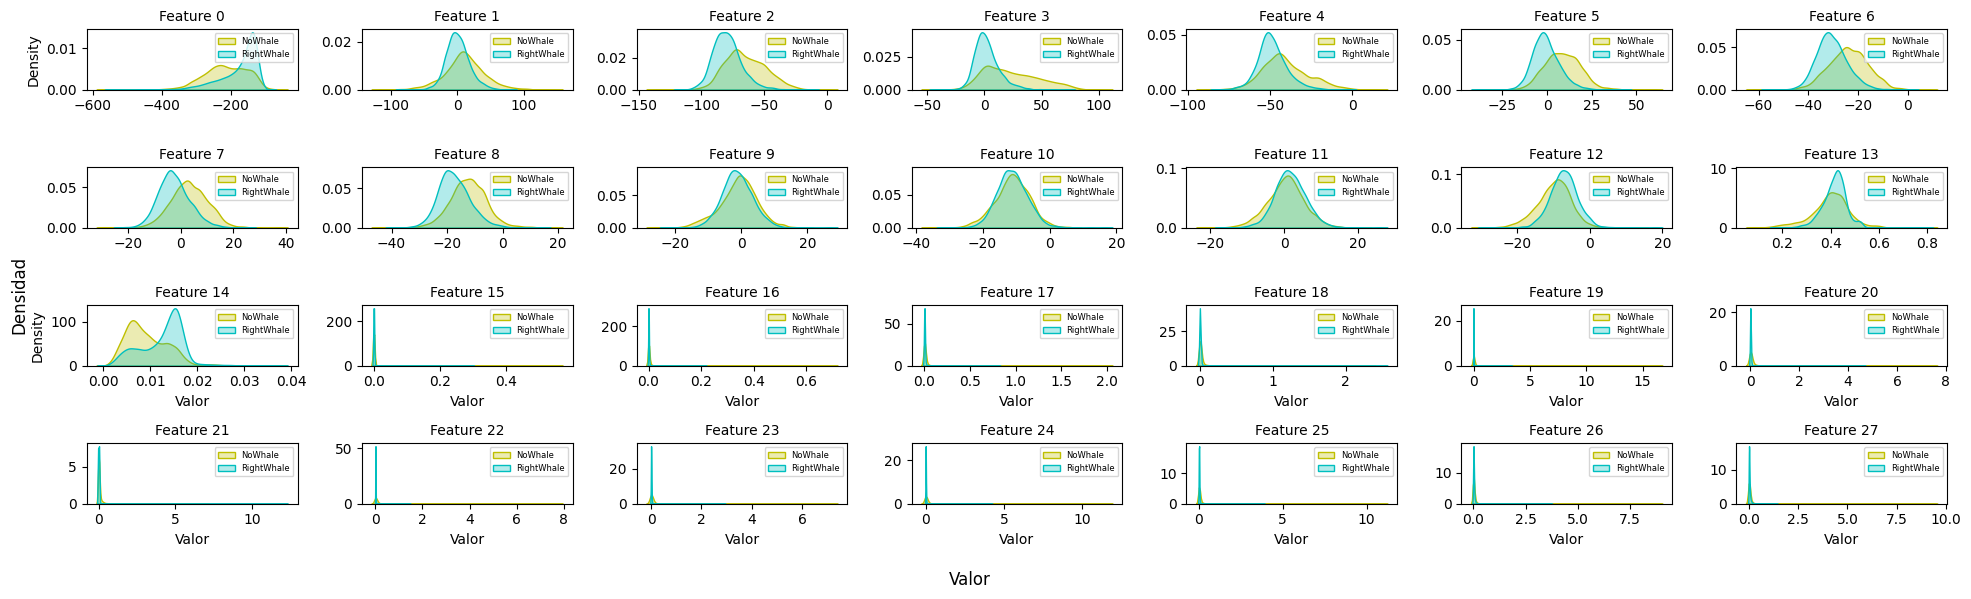

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, axs = plt.subplots(4, 7, figsize=(20, 6))
axs = axs.flatten()

label_binary = features_df['label_binary']
class_labels = {0: 'NoWhale', 1: 'RightWhale'}
colors = ['y', 'c']

for col in range(features_df.shape[1] - 2):

    df_temp = pd.DataFrame({
        'Valor': features_df.iloc[:, col],
        'Etiqueta': label_binary.values
    })

    ax = axs[col]
    for label, color in zip(class_labels.keys(), colors):
        sns.kdeplot(
            data=df_temp[df_temp['Etiqueta'] == label],
            x='Valor',
            ax=ax, fill=True,
            label=class_labels[label], color=color,
            alpha=0.3
            )
    ax.legend(fontsize=6)
    ax.set_title("Feature " + str(features_df.columns[col]), fontsize=10)

    ax.set_title("Feature " + str(features_df.columns[col]), fontsize=10)
    if col // 14 != 1:
        ax.set_xlabel('')
    if col % 14 != 0:
        ax.set_ylabel('')

fig.supxlabel('Valor', fontsize=12)
fig.supylabel('Densidad', fontsize=12)

plt.tight_layout()
plt.show()


- Existen 4 atributos con picos no solapados que son 0, 7, 8, 14. y por ende serian características que permiten con gran facilidad poder diferenciar entre las clases, los datos deberían tener baja incertidumbre y esto permitira una clasificación más precisa, **cabe resaltar que ninguna característica tiene las distribuciones separadas, en todas hay solapamiento.**  
- Luego las características solapadas pero con la altura de los picos determinan una predominancia mayor de una clase sobre la otra, en este sentido para la clasificación con estos datos seria necesario utilizar límites de desición no lineales capaces de en dimensiones extra obtener las diferencias a partir de este desnivel
- Por otro lado en los gráficos en los que los picos se ven concentrados en un extremo como en las gráicas 15 a 27, implica que la distribución tiene un rango demasiado grande, por ende será necesario hacer normalizaciones apropiadas y no perder presición por esta dispersion de los datos.
- Respecto a las gráficas que están solapadas y tienen la misma altura de picos, el reto es más complejo, encontrar diferencias entre estas características implica analizar relaciones implícitas con otras varibles no visibles a simple vista con la relación directa de cada clase con la clase que queremos clasificar,

## Extraccion de características para los datos que se suben a Kaggle

In [12]:
kaggle_files = os.listdir('/content/project4/test/test')
print(f"Archivos en test: {len(kaggle_files)}")
# Mostramos los primeros 5 archivos:
print(kaggle_files[:5])
kaggle_data = pd.DataFrame({
    'file_path': [os.path.join('/content/project4/test/test', file) for file in kaggle_files]
})

Archivos en test: 1962
['77.wav', '206.wav', '1179.wav', '1608.wav', '1139.wav']


In [13]:
import librosa
import numpy as np
from tqdm import tqdm
features_list_kaggle = []
print("Extrayendo caracteristicas...")
for _, row in tqdm(kaggle_data.iterrows(), total=len(kaggle_data)):
    file_path = row['file_path']
    features = extract_features(file_path)
    features_list_kaggle.append(features)

features_df_kaggle = pd.DataFrame(features_list_kaggle)
print("Caracteristicas extraidas correctamente")
features_df_kaggle['ids'] = kaggle_data['file_path'].apply(lambda x: x.split('/')[-1].split('.')[0])



Extrayendo caracteristicas...


100%|██████████| 1962/1962 [00:37<00:00, 53.00it/s]


Caracteristicas extraidas correctamente


### Nos aseguramos de tener las mismas variables y etiquetas en el orden que se generan las caraceterísticas de la función

In [ ]:
features_df_kaggle.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,ids
0,-138.889908,23.160976,-51.348221,15.125238,-29.460085,2.929171,-22.615276,10.457059,-6.279806,5.786880,...,0.191335,0.084987,0.051512,0.012209,0.013745,0.018911,0.156731,0.185221,0.028291,77
1,-201.585831,24.682121,-68.983124,14.582001,-42.630344,5.094867,-25.538496,0.380706,-18.891123,-0.819588,...,0.005149,0.013618,0.015634,0.016830,0.022925,0.021644,0.043140,0.023002,0.010978,206
2,-274.861328,16.331429,-82.166985,7.598515,-54.300022,-4.128945,-41.045311,-4.736150,-9.805058,-1.909923,...,0.000031,0.000082,0.000286,0.000467,0.000361,0.000835,0.001175,0.001293,0.006158,1179
3,-115.865715,8.433858,-53.475258,9.128684,-38.081993,4.387255,-22.619017,4.659291,-11.543087,7.611123,...,0.006974,0.004400,0.015867,0.007406,0.012373,0.023082,0.026438,0.033690,0.026178,1608
4,-139.280487,10.629441,-80.503418,0.330187,-39.709103,8.730156,-24.339712,7.183836,-10.635600,7.789875,...,0.007440,0.002189,0.001377,0.002457,0.003752,0.003415,0.007378,0.006946,0.013920,1139


## Evaluación de la estructura y relaciones implícitas en los datos

In [ ]:
pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,label,label_binary
0,-267.220520,-2.285036,-58.037872,30.968855,-53.202671,30.096140,-22.377308,2.798055,2.731711,-8.680118,...,0.006227,0.003766,0.009686,0.001406,0.002087,0.003117,0.000657,0.005226,NoWhale,0
1,-160.271484,9.050753,-90.396683,-7.026216,-65.718193,-6.163895,-40.646149,-16.760578,-25.437500,-6.043705,...,0.000133,0.000294,0.000454,0.000291,0.000477,0.010898,0.030145,0.048611,RightWhale,1
2,-172.700378,-2.832167,-89.855881,-4.574318,-52.284760,-12.788486,-23.770092,-0.341910,-22.506706,-1.203676,...,0.000314,0.000431,0.000864,0.001452,0.001859,0.002338,0.005169,0.003566,NoWhale,0
3,-125.465424,35.486519,-38.092823,33.959511,-16.910742,16.710655,-15.208988,-3.512811,-23.834385,-6.736728,...,0.266300,0.129367,0.090048,0.140451,0.188896,0.227481,0.709141,1.069465,NoWhale,0
4,-250.242035,-17.914928,-51.859844,62.088684,-40.552017,10.640687,-22.691856,-4.598437,-12.277948,-6.627849,...,0.008406,0.012265,0.013113,0.009765,0.104929,0.066329,0.002059,0.013608,NoWhale,0


## Separamos los datos por las características no solapadas respecto a la clase de clasificación.

In [ ]:
mejores_caracteristicas = [0, 7, 8, 14]
resto_caracteristicas = [i for i in range(28) if i not in mejores_caracteristicas]

## Evaluación de las relaciones y estructuras implícitas mediante UMAP y TSNE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

tsne = TSNE(n_components=2)
reducer = umap.UMAP(n_components=2)

X_tsne = tsne.fit_transform(features_df[features_df.columns[:-2]])
X_umap = reducer.fit_transform(features_df[features_df.columns[:-2]])


In [ ]:
X_mejores = features_df.iloc[:, mejores_caracteristicas]
X_resto = features_df.iloc[:, resto_caracteristicas]


tsne_mejores = TSNE(n_components=2)
reducer_mejores = umap.UMAP(n_components=2)

tsne_resto = TSNE(n_components=2)
reducer_resto = umap.UMAP(n_components=2)

X_tsne_mejores = tsne_mejores.fit_transform(X_mejores)
X_umap_mejores = reducer_mejores.fit_transform(X_mejores)

X_tsne_resto = tsne_resto.fit_transform(X_resto)
X_umap_resto = reducer_resto.fit_transform(X_resto)


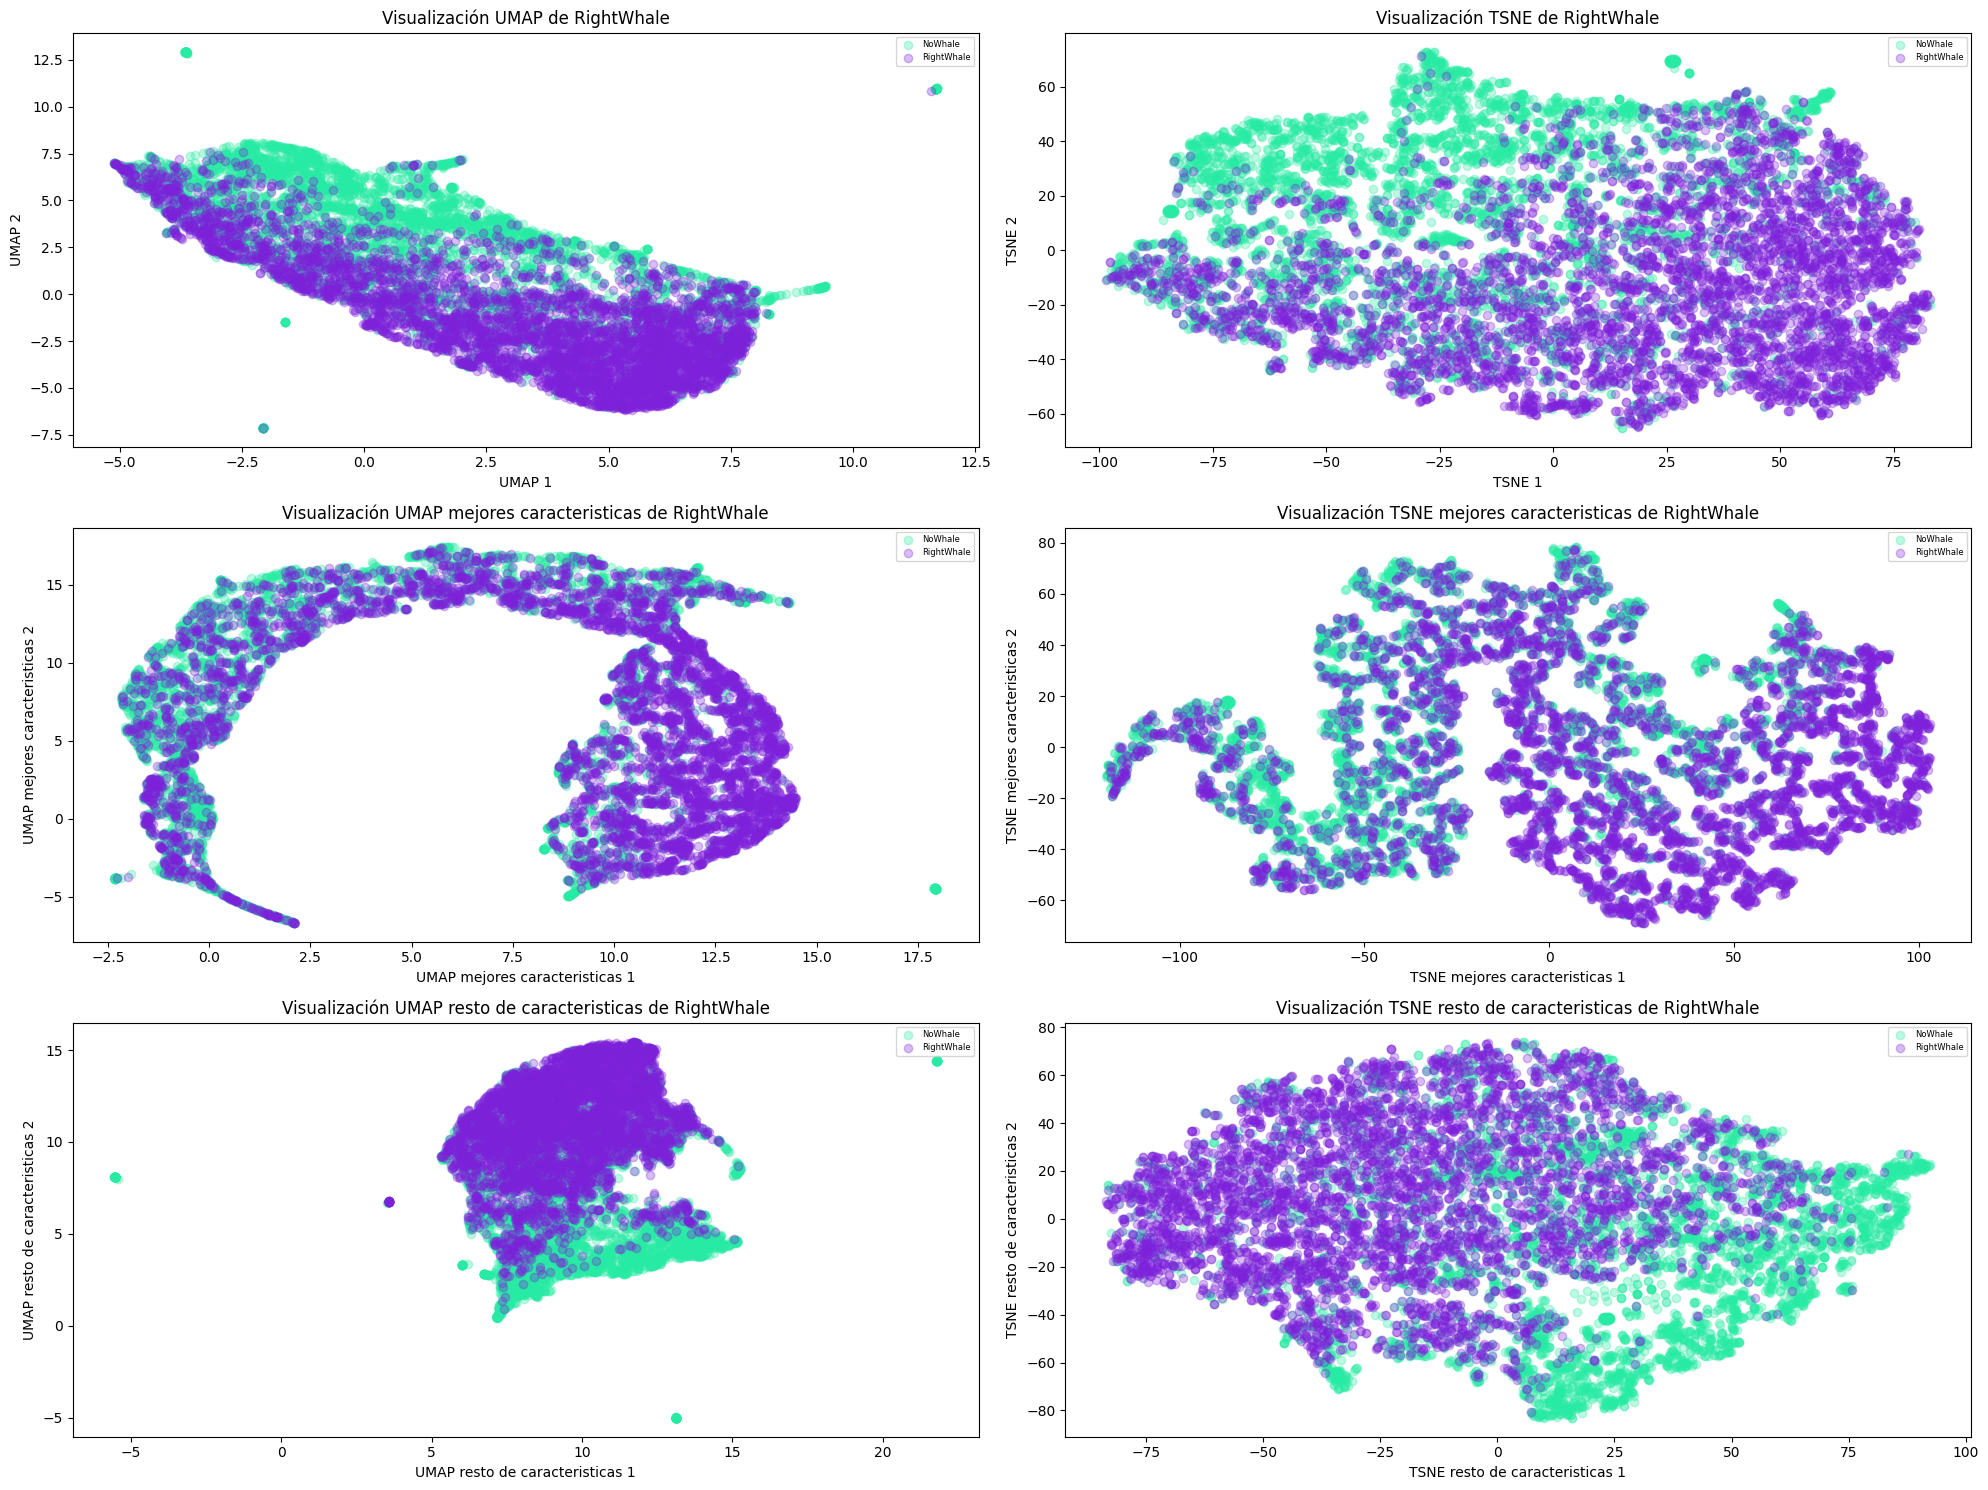

In [ ]:
import matplotlib.pyplot as plt

class_labels = {0: 'NoWhale', 1: 'RightWhale'}
colors = ['#27eba4', '#7e21db']
titles = {
    'UMAP': X_umap, 'TSNE':X_tsne,
    'UMAP mejores caracteristicas':X_umap_mejores, 'TSNE mejores caracteristicas': X_tsne_mejores,
    'UMAP resto de caracteristicas': X_umap_resto, 'TSNE resto de caracteristicas': X_tsne_resto}


fig, axs = plt.subplots(3, 2, figsize=(20, 15))
axs = axs.flatten()
col = 0
for map, data in titles.items():
  ax = axs[col]
  for label, color in zip(class_labels.keys(), colors):
      ax.scatter(
          x=data[label_binary.values == label, 0],
          y=data[label_binary.values == label, 1],
          label=class_labels[label],
          color=color,
          alpha=0.3
      )
      ax.legend(fontsize=6)
      ax.set_title('Visualización {} de RightWhale'.format(map))
      ax.set_xlabel('{} 1'.format(map))
      ax.set_ylabel('{} 2'.format(map))

  col += 1

plt.tight_layout()
plt.show()


- Respecto a la estructura:
  - En UMAP para todas las características y el resto que no eran las que tenian los picos de su distribución separados, demustran que existe separación entre las clases, no definitiva que nos permita tener una clasificación precisa pero a partir de modelos complejos que destaquen en limites de desición basados en separar la distribución de los datos deberían tener buen rendimiento, como Random Forest, Gradient Boosting y SVM.
  - Sin embargo en la estructura de las características que definimos como mejores por tener picos de distribución separados, demostraron ser los menos distinguibles entre sí para la clasificación, e incluso forman una estructura uniforme respecto a las clases, por ende captar diferencias requerira modelos con limites de desición complejos.
- Respecto a las relaciones:
  - Similar a los resultados en UMAP, las relaciones que muestra TSNE resaltan diferencias en las relaciones de todas las clases y el resto de clases, pero como las relaciones de las caracteristicas que definimos como mejores también salieron uniformes, para obtener diferencias será necesario pasar los datos por un modelo de extracción de características más complejas, relaciones que sean suficientes para distinguir a los datos, como las redes neuronales o clustering.


## Evaluación de la entropía y la incertidumbre en las clases

In [ ]:
def calcular_entropia(df):
    entropia = df.apply(lambda column: calcular_entropia_columna(column))
    return entropia
def calcular_entropia_columna(columna):
    frecuencia = columna.value_counts()
    probabilidad = frecuencia / frecuencia.sum()
    entropia_valores = -probabilidad * np.log2(probabilidad)
    return entropia_valores.sum()
entropias = calcular_entropia(features_df.drop(columns=['label', 'label_binary']))
entropias = entropias.sort_values(ascending=False)
entropias = entropias.reset_index()
entropias.columns = ['características', 'Entropía']
entropias

,características,Entropía
0,26,13.352995
1,3,13.352995
2,21,13.352995
3,20,13.352995
4,18,13.352995
5,16,13.352995
6,27,13.352813
7,24,13.352813
8,22,13.352813
9,19,13.352813


### Teniendo toda la información obtenida, decidimos lo siguiente
- Primero es necesario utilizar todas las características, a pesar que en las gráficas de ditribuciones, estructura y relaciones, el score de la entropía es muy similar entre todas las caraterísticas, bajo un enfoque estricto todas las clases se distribuyen en la misma incertidumbre respecto a la clase de clasificación, no podemos definir un grupo que detaque sobre otro.
- Evaluaremos los resultados de límites de desición no lineales más simples: Logistic Regresion, KNN, Random Forest, Gradient Boosting y SVM, ahora pasaremos a preprocesar los datos para los modelos.

#PREPROCESAMIENTO

## Evaluamos múltiples normalizaciones para reducir el error de la dispersion de los datos de la característica 15 a 27

In [14]:
import matplotlib as mpl
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt

from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)

scalers_fun = {
    "MaxAbsScaler": MaxAbsScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "Normalizer": Normalizer(),
    "PowerTransformer": PowerTransformer(),
    "RobustScaler": RobustScaler(),
    "StandardScaler": StandardScaler(),
    "QuantileTransformer": QuantileTransformer(output_distribution="uniform", random_state=42),
    "QuantileTransformer": QuantileTransformer(output_distribution="normal", random_state=42),
    "RobustScaler": RobustScaler(quantile_range=(25, 75)),
    "PowerTransformer": PowerTransformer(method="yeo-johnson"),
    }

In [ ]:
MaxAbsScaler, MinMaxScaler, Normalizer, PowerTransformer, RobustScaler, StandardScaler, QuantileTransformer, QuantileTransformer, RobustScaler, PowerTransformer

In [15]:
# Author:  Raghav RV <rvraghav93@gmail.com>
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Thomas Unterthiner
# License: BSD 3 clause
X = features_df.drop(columns=['label', 'label_binary'])

scalers_fun["MaxAbsScaler"].fit(X)
scalers_fun["MinMaxScaler"].fit(X)
scalers_fun["Normalizer"].fit(X)
scalers_fun["PowerTransformer"].fit(X)
scalers_fun["RobustScaler"].fit(X)
scalers_fun["StandardScaler"].fit(X)
scalers_fun["QuantileTransformer"].fit(X)
scalers_fun["QuantileTransformer"].fit(X)
scalers_fun["RobustScaler"].fit(X)
scalers_fun["PowerTransformer"].fit(X)


scalers_dict = {
    "MaxAbsScaler":  scalers_fun["MaxAbsScaler"].transform(X),
    "MinMaxScaler":  scalers_fun["MinMaxScaler"].transform(X),
    "Normalizer":  scalers_fun["Normalizer"].transform(X),
    "PowerTransformer":  scalers_fun["PowerTransformer"].transform(X),
    "RobustScaler":  scalers_fun["RobustScaler"].transform(X),
    "StandardScaler":  scalers_fun["StandardScaler"].transform(X),
    "QuantileTransformer":  scalers_fun["QuantileTransformer"].transform(X),
    "QuantileTransformer":  scalers_fun["QuantileTransformer"].transform(X),
    "RobustScaler":  scalers_fun["RobustScaler"].transform(X),
    "PowerTransformer":  scalers_fun["PowerTransformer"].transform(X)
    }
list_columns = features_df.drop(columns=['label', 'label_binary']).columns

#MODELAMIENTO

## Evaluación de la mejor normalización a través del rendimiento de los modelos
Para asegurar la estabilidad y generalización del modelo elegido, usaremos Cross Validation con cada normalización.

## Regresion Logística

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for scaler_name, scaled_data in scalers_dict.items():#
    print(scaler_name)

    pipeline_all_features = Pipeline([
        ('model', LogisticRegression(random_state=42, max_iter=1000))
    ])

    # Validación cruzada:
    scores_all_features = cross_val_score(
        pipeline_all_features, scaled_data, label_binary.values, cv=5, scoring='accuracy'
    )
    print(f"Resultados con todas las caracteristicas (escaladas):")
    print(f"Accuracy promedio: {scores_all_features.mean():.4f}")
    print(f"Desviación estándar: {scores_all_features.std():.4f}")




MaxAbsScaler
Resultados con todas las caracteristicas (escaladas):
Accuracy promedio: 0.7811
Desviación estándar: 0.0058
MinMaxScaler
Resultados con todas las caracteristicas (escaladas):
Accuracy promedio: 0.7813
Desviación estándar: 0.0065
Normalizer
Resultados con todas las caracteristicas (escaladas):
Accuracy promedio: 0.7649
Desviación estándar: 0.0049
PowerTransformer
Resultados con todas las caracteristicas (escaladas):
Accuracy promedio: 0.7872
Desviación estándar: 0.0073
RobustScaler
Resultados con todas las caracteristicas (escaladas):
Accuracy promedio: 0.7841
Desviación estándar: 0.0062
StandardScaler
Resultados con todas las caracteristicas (escaladas):
Accuracy promedio: 0.7841
Desviación estándar: 0.0062
minmax_scale
Resultados con todas las caracteristicas (escaladas):
Accuracy promedio: 0.7813
Desviación estándar: 0.0065
QuantileTransformer
Resultados con todas las caracteristicas (escaladas):
Accuracy promedio: 0.8001
Desviación estándar: 0.0073


## Random Forest

Antes, evaluaremos la entropía de los datos.

In [ ]:
for scaler_name, scaled_data in scalers_dict.items():
    print(scaler_name)

    pipeline_all_features_rf = Pipeline([
        ('model', RandomForestClassifier(random_state=42))
    ])

    scores_all_features_rf = cross_val_score(
        pipeline_all_features_rf, scaled_data, label_binary.values, cv=5, scoring='accuracy'
    )
    print(f"Resultados con todas las caracteristicas (escaladas) - Random Forest:")
    print(f"Accuracy promedio: {scores_all_features_rf.mean():.4f}")
    print(f"Desviación estándar: {scores_all_features_rf.std():.4f}")



MaxAbsScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8217
Desviación estándar: 0.0024
MinMaxScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8217
Desviación estándar: 0.0024
Normalizer
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8181
Desviación estándar: 0.0051
PowerTransformer
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8231
Desviación estándar: 0.0051
RobustScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8231
Desviación estándar: 0.0056
StandardScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8228
Desviación estándar: 0.0038
minmax_scale
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8217
Desviación estándar: 0.0024
QuantileTransformer
Resultados con to

## SVM

In [ ]:
for scaler_name, scaled_data in scalers_dict.items():
    print(scaler_name)

    pipeline_all_features_svm = Pipeline([
        ('model', SVC(kernel='rbf', random_state=42))
    ])

    scores_all_features_svm = cross_val_score(
        pipeline_all_features_svm, scaled_data, label_binary.values, cv=5, scoring='accuracy'
    )
    print(f"Resultados con todas las caracteristicas (escaladas) - SVM:")
    print(f"Accuracy promedio: {scores_all_features_svm.mean():.4f}")
    print(f"Desviación estándar: {scores_all_features_svm.std():.4f}")


MaxAbsScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.7979
Desviación estándar: 0.0077
MinMaxScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.7906
Desviación estándar: 0.0075
Normalizer
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.7770
Desviación estándar: 0.0058
PowerTransformer
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8262
Desviación estándar: 0.0100
RobustScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.7629
Desviación estándar: 0.0055
StandardScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8110
Desviación estándar: 0.0110
minmax_scale
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.7906
Desviación estándar: 0.0075
QuantileTransformer
Resultados con to

## Gradient Boosting

In [ ]:
for scaler_name, scaled_data in scalers_dict.items():
    print(scaler_name)

    pipeline_all_features_gbc = Pipeline([
        ('model', GradientBoostingClassifier(random_state=42))
    ])

    scores_all_features_gbc = cross_val_score(
        pipeline_all_features_gbc, scaled_data, label_binary.values, cv=5, scoring='accuracy'
    )
    print(f"Resultados con todas las caracteristicas (escaladas) - Gradient Boosting:")
    print(f"Accuracy promedio: {scores_all_features_gbc.mean():.4f}")
    print(f"Desviación estándar: {scores_all_features_gbc.std():.4f}")


MaxAbsScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8147
Desviación estándar: 0.0108
MinMaxScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8146
Desviación estándar: 0.0093
Normalizer
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8137
Desviación estándar: 0.0108
PowerTransformer
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8158
Desviación estándar: 0.0089
RobustScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8136
Desviación estándar: 0.0087
StandardScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8142
Desviación estándar: 0.0105
minmax_scale
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8146
Desviación estándar: 0.0093
QuantileTransformer
Resultados con to

## KNN

In [ ]:
for scaler_name, scaled_data in scalers_dict.items():
    print(scaler_name)

    pipeline_all_features_knn = Pipeline([
        ('model', KNeighborsClassifier())
    ])

    scores_all_features_knn = cross_val_score(
        pipeline_all_features_knn, scaled_data, label_binary.values, cv=5, scoring='accuracy'
    )
    print(f"Resultados con todas las caracteristicas (escaladas) - KNN:")
    print(f"Accuracy promedio: {scores_all_features_knn.mean():.4f}")
    print(f"Desviación estándar: {scores_all_features_knn.std():.4f}")


MaxAbsScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8016
Desviación estándar: 0.0069
MinMaxScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8010
Desviación estándar: 0.0053
Normalizer
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.7887
Desviación estándar: 0.0051
PowerTransformer
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8031
Desviación estándar: 0.0065
RobustScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.7844
Desviación estándar: 0.0094
StandardScaler
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8012
Desviación estándar: 0.0070
minmax_scale
Resultados con todas las caracteristicas (escaladas) - Random Forest:
Accuracy promedio: 0.8010
Desviación estándar: 0.0053
QuantileTransformer
Resultados con to

Obtuvimos los mejores scores por modelo:
- Logistic Regression: 0.8001 accuracy con QuantileTransformer
- Random Forest: 0.8233 accuracy con QuantileTransformer
- SVM: 0.8314 accuracy con QuantileTransformer
- Gradient Boosting 0.8158 accurac con PowerTransformer
- KNN: 0.8031 accuracy con PowerTransformer

## Optimización de hiperparámetros:  
Para los mejores modelos:
- Random Forest
- SVM
- Gradient Boosting

De las pruebas con cross validation los mejores modelos fueron:


In [16]:
from sklearn.model_selection import train_test_split
rf_data = scalers_dict['PowerTransformer']
svm_data = scalers_dict['QuantileTransformer']
gbd_data = scalers_dict['PowerTransformer']

### Utilizamos una grilla de combinaciones posibles de parámetros

### Modelos: 1) Gradient Boosting

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(gbd_data, label_binary.values, test_size=0.2)

In [20]:
param_grid = {
    'n_estimators': [4, 8, 16, 32],
    'learning_rate': [0.1, 0.5, 0.01],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 32, 'subsample': 1.0}


In [21]:
X_train, X_test, y_train, y_test = train_test_split(gbd_data, label_binary.values, test_size=0.2)

gb_clf = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 9, min_samples_leaf= 4, min_samples_split= 2, n_estimators= 32, subsample= 1.0, random_state=42)
gb_clf.fit(X_train, y_train)

# Evaluamos el modelo:
y_pred= gb_clf.predict(X_test)
print("Mejores resultados con Gradient Boosting:")
print(classification_report(y_test, y_pred))

Mejores resultados con Gradient Boosting:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1111
           1       0.79      0.84      0.82      1076

    accuracy                           0.81      2187
   macro avg       0.82      0.81      0.81      2187
weighted avg       0.82      0.81      0.81      2187



### Modelos: 2) Random Forest Classifier

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(rf_data, label_binary.values, test_size=0.2)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)


Mejores parámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


### Modelos: 3) Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(svm_data, label_binary.values, test_size=0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 0.01, 0.001, 0.0001, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)

# RESULTADOS

## Hacemos fine tunning para obtener los mejores hiperparámetros:

### 1) Gradient Boosting:

In [28]:
X_train, X_test, y_train, y_test = train_test_split(gbd_data, label_binary.values, test_size=0.2)

gb_clf = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 9, min_samples_leaf= 4, min_samples_split= 2, n_estimators= 32, subsample= 1.0, random_state=42)
gb_clf.fit(X_train, y_train)

# Evaluamos el modelo:
y_pred= gb_clf.predict(X_test)
print("Mejores resultados con Gradient Boosting:")
print(classification_report(y_test, y_pred))

Mejores resultados con Gradient Boosting:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1122
           1       0.81      0.85      0.83      1065

    accuracy                           0.83      2187
   macro avg       0.83      0.83      0.83      2187
weighted avg       0.83      0.83      0.83      2187



### 2) Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(rf_data, label_binary.values, test_size=0.2)

rf_model = RandomForestClassifier(random_state=42, max_iter=1000)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("Mejores resultados con Random Foreset:")
print(classification_report(y_test, y_pred))

### 3) SVM:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(svm_data, label_binary.values, test_size=0.2)

svm = SVC(random_state=42, C=1,gamma=0.1,kernel='rbf')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("Mejores resultados con SVM:")
print(classification_report(y_test, y_pred))

Mejores resultados con SVM:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1062
           1       0.83      0.86      0.85      1125

    accuracy                           0.84      2187
   macro avg       0.84      0.84      0.84      2187
weighted avg       0.84      0.84      0.84      2187



## Codigo para el submission en Kaggle


In [ ]:
def crear_submission(scaler=None, model=None, data=None, ids=None):
  # X_kaggle_preprocessed = data.drop(columns=['ids'])
  X_kaggle_scaled = scaler.transform(data)
  y_kaggle_pred = model.predict(X_kaggle_scaled)
  submission = pd.DataFrame({
      'idx': ids,
      'class': y_kaggle_pred
  })
  submission.index = submission['idx']
  submission = submission.drop(columns=['idx'])
  submission['class'] = submission['class'].apply(lambda x: 'RightWhale' if x==1 else 'NoWhale')
  submission.to_csv('submission.csv')

In [ ]:
process = features_df_kaggle.drop(columns=['ids'])
ids = features_df_kaggle['ids'].values
crear_submission(scaler=scalers_fun['QuantileTransformer'], model=svc, data=process, ids=ids)